In [1]:
# Import dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import models as tests
import models2 as tests2


In [2]:
# Read in CSV data and check for nulls and dtypes
df = pd.read_csv('../datasets/wine_data2.csv')

# Check column names, null values and Dtypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4074 non-null   int64  
 1   fixed.acidity         4074 non-null   float64
 2   volatile.acidity      4074 non-null   float64
 3   citric.acid           4074 non-null   float64
 4   residual.sugar        4074 non-null   float64
 5   chlorides             4074 non-null   float64
 6   free.sulfur.dioxide   4074 non-null   float64
 7   total.sulfur.dioxide  4074 non-null   float64
 8   pH                    4074 non-null   float64
 9   sulphates             4074 non-null   float64
 10  alcohol               4074 non-null   float64
 11  quality               4074 non-null   int64  
 12  rt.sulfur.dioxide     2037 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 413.9 KB


In [3]:
# Check unique values of quality column
df['quality'].unique()

array([6, 7, 5, 4, 8, 9, 3], dtype=int64)

In [4]:
# Check how many of each value to pick where to create good/bad thresholds
df['quality'].value_counts(normalize=True)

quality
6    0.462199
5    0.278351
7    0.196858
8    0.036573
4    0.022582
3    0.002455
9    0.000982
Name: proportion, dtype: float64

In [5]:
# Create threshold for bad category
threshold = 6
df['quality'] = df['quality'].where(df['quality'] > threshold, other=0)

# Check quality column for unique value changes
print(df['quality'].unique())

[0 7 8 9]


In [6]:
# Create threshold for good category
threshold = 7
df['quality'] = df['quality'].where(df['quality'] < threshold, other=1)

# Check quality column for unique value changes
print(df['quality'].unique())

[0 1]


In [7]:
# Check value percentages
df['quality'].value_counts(normalize=True)

quality
0    0.765587
1    0.234413
Name: proportion, dtype: float64

In [8]:
# set X and y variables
X = df.drop(columns=['quality','rt.sulfur.dioxide','Unnamed: 0'])
y = df['quality']

In [9]:
# Split data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=13)

In [10]:
# Flatten y_train and y_test data
y_train = y_train.ravel()
y_test = y_test.ravel()



Random Forest 
Test Accuracy: 0.8655544651619235
balanced test score: 0.7782310946589106
classification report: 
               precision    recall  f1-score   support

           0       0.89      0.95      0.91       775
           1       0.78      0.61      0.69       244

    accuracy                           0.87      1019
   macro avg       0.83      0.78      0.80      1019
weighted avg       0.86      0.87      0.86      1019


Gradient Boost 
Test Accuracy: 0.8135426889106968
balanced test score: 0.6850687466948704

 classification report: 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       775
           1       0.67      0.44      0.53       244

    accuracy                           0.81      1019
   macro avg       0.75      0.69      0.71      1019
weighted avg       0.80      0.81      0.80      1019


Logistic Regression 
Test Accuracy: 0.7733071638861629
balanced test score: 0.5898202009518773
classification re

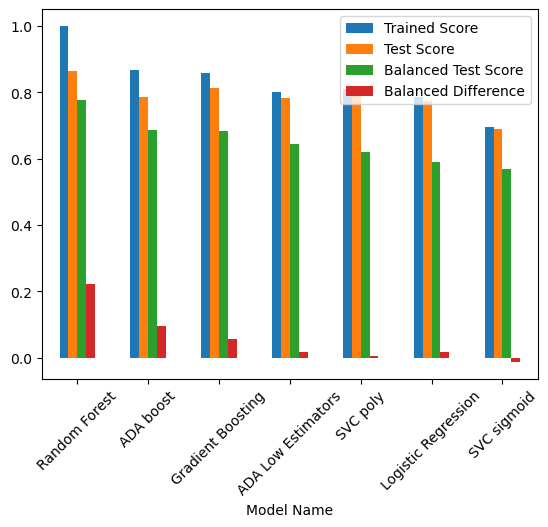

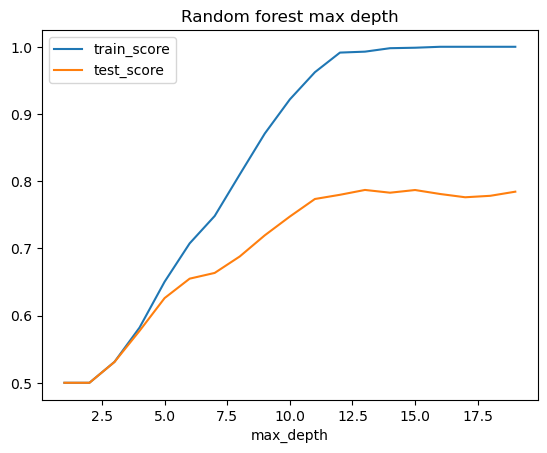

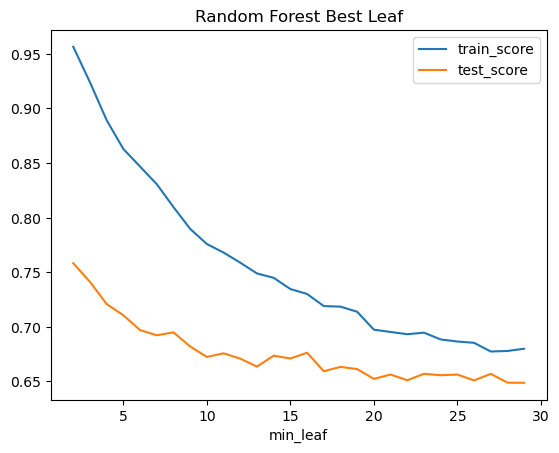

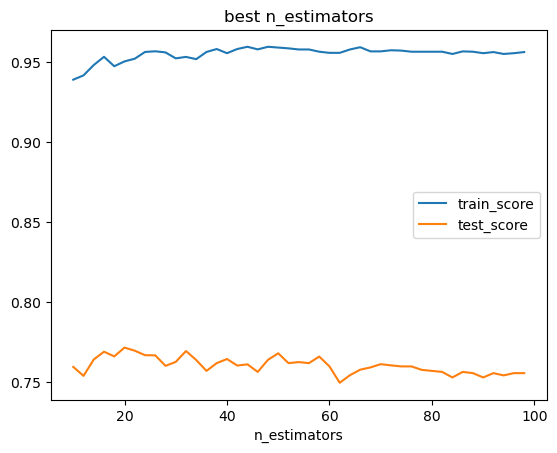

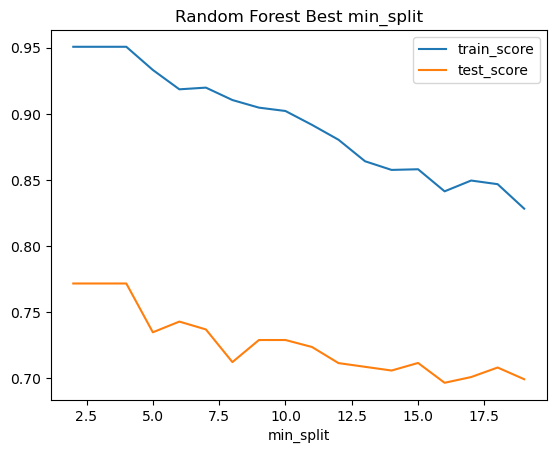

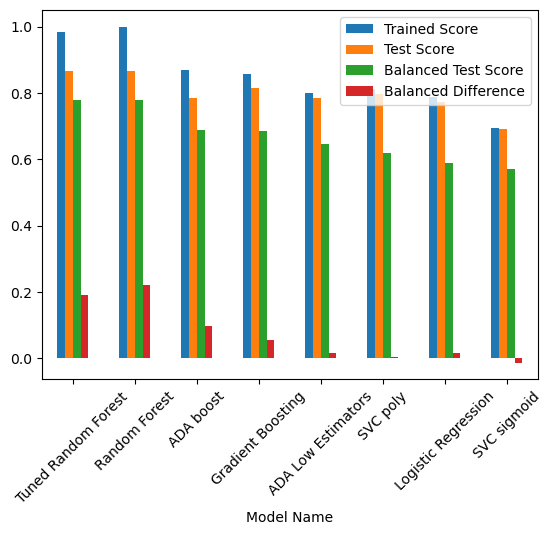

In [11]:
# Run split data through the 'many_models' function
models1 = tests.many_models(X_train,y_train,X_test,y_test)

In [12]:
#models2 = tests2.many_models(X_train,y_train,X_test,y_test)